In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [60]:
# from google.colab import files
# upload=files.upload()


# **DATA READ**

In [61]:
df=pd.read_excel('marketing_campaign1 (1).xlsx')

In [62]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


# **EDA AND FEATURE ENGINEERING**

In [63]:
# Feature Engineering
df['Age'] = 2024 - df['Year_Birth']  # Calculate Age from Year_Birth
# Combining different dataframe into a single column to reduce the number of dimension
df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases'] + df["NumWebVisitsMonth"]

In [64]:
# Drop unnecessary columns
df = df.drop(columns=['Year_Birth',"AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"])

In [65]:
df

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Z_CostContact,Z_Revenue,Age,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,5524,Graduation,Single,58138.0,2012-09-04,58,0,3,11,67,0,1617,1,32
1,2174,Graduation,Single,46344.0,2014-03-08,38,0,3,11,70,2,27,0,11
2,4141,Graduation,Together,71613.0,2013-08-21,26,0,3,11,59,0,776,0,25
3,6182,Graduation,Together,26646.0,2014-02-10,26,0,3,11,40,1,53,0,14
4,5324,PhD,Married,58293.0,2014-01-19,94,0,3,11,43,1,422,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,2013-06-13,46,0,3,11,57,1,1341,0,23
2236,4001,PhD,Together,64014.0,2014-06-10,56,0,3,11,78,3,444,1,29
2237,7270,Graduation,Divorced,56981.0,2014-01-25,91,0,3,11,43,0,1241,1,25
2238,8235,Master,Together,69245.0,2014-01-24,8,0,3,11,68,1,843,0,26


In [66]:
df=df.drop(columns=['ID', 'Z_CostContact'	,'Z_Revenue','Dt_Customer'])

In [67]:
df

,Education,Marital_Status,Income,Recency,Complain,Age,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,Graduation,Single,58138.0,58,0,67,0,1617,1,32
1,Graduation,Single,46344.0,38,0,70,2,27,0,11
2,Graduation,Together,71613.0,26,0,59,0,776,0,25
3,Graduation,Together,26646.0,26,0,40,1,53,0,14
4,PhD,Married,58293.0,94,0,43,1,422,0,24
...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,46,0,57,1,1341,0,23
2236,PhD,Together,64014.0,56,0,78,3,444,1,29
2237,Graduation,Divorced,56981.0,91,0,43,0,1241,1,25
2238,Master,Together,69245.0,8,0,68,1,843,0,26


In [68]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236     True
2237    False
2238    False
2239    False
Length: 2240, dtype: bool

In [69]:
df = df.drop_duplicates()


In [70]:
print(df.isnull().sum())

Education             0
Marital_Status        0
Income               24
Recency               0
Complain              0
Age                   0
Kids                  0
Expenses              0
TotalAcceptedCmp      0
NumTotalPurchases     0
dtype: int64


In [71]:
df = df.dropna()

In [72]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2034 entries, 0 to 2239
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2034 non-null   object 
 1   Marital_Status     2034 non-null   object 
 2   Income             2034 non-null   float64
 3   Recency            2034 non-null   int64  
 4   Complain           2034 non-null   int64  
 5   Age                2034 non-null   int64  
 6   Kids               2034 non-null   int64  
 7   Expenses           2034 non-null   int64  
 8   TotalAcceptedCmp   2034 non-null   int64  
 9   NumTotalPurchases  2034 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 174.8+ KB
None


In [73]:
#Unique Values
total_unique_values = df.nunique()
print('Total number of unique values:', total_unique_values)

Total number of unique values: Education               5
Marital_Status          8
Income               1974
Recency               100
Complain                2
Age                    59
Kids                    4
Expenses             1047
TotalAcceptedCmp        6
NumTotalPurchases      41
dtype: int64


In [74]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'Complain', 'Age',
       'Kids', 'Expenses', 'TotalAcceptedCmp', 'NumTotalPurchases'],
      dtype='object')

In [75]:
#NUMERICAL COLUMNS
numerical_features = ['Income', 'Recency', 'Complain', 'Age',
       'Kids', 'Expenses', 'TotalAcceptedCmp', 'NumTotalPurchases' ]

In [76]:
#CATEGORICAL COLUMNS
categorical_features = ['Education', 'Marital_Status']

In [77]:
#PIE PLOT of COLUMN MArital Status
import plotly.express as px
fig =  px.pie (df, names = "Marital_Status", hole = 0.4, template = "gridon")
fig.show ()

In [78]:
#pie plot of education
fig =  px.pie (df, names = "Education", hole = 0.4, template = "gridon")
fig.show ()

In [79]:
correlation_matrix = df[numerical_features].corr()

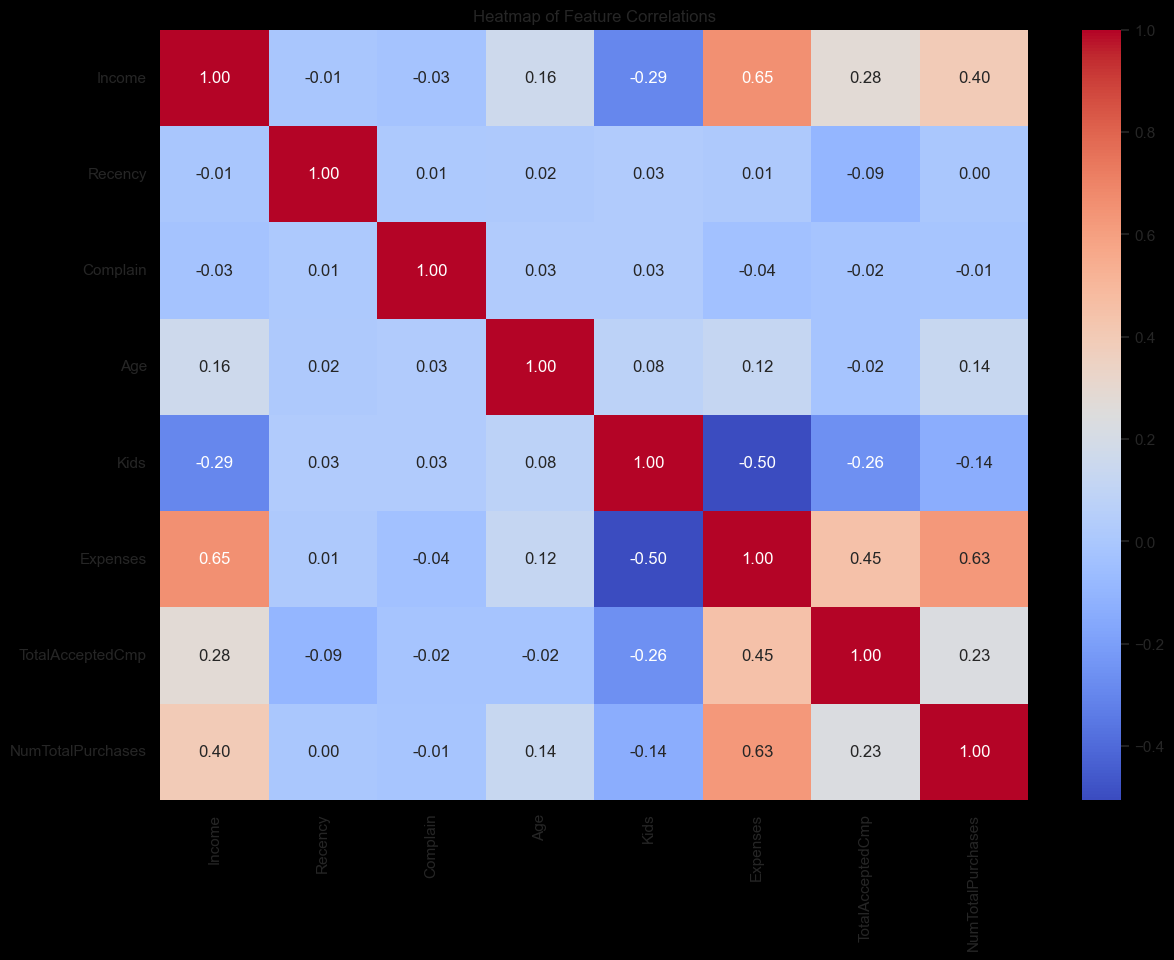

In [80]:
# Heatmap for correlation between numerical features
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Feature Correlations')
plt.show()

In [81]:
df

,Education,Marital_Status,Income,Recency,Complain,Age,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,Graduation,Single,58138.0,58,0,67,0,1617,1,32
1,Graduation,Single,46344.0,38,0,70,2,27,0,11
2,Graduation,Together,71613.0,26,0,59,0,776,0,25
3,Graduation,Together,26646.0,26,0,40,1,53,0,14
4,PhD,Married,58293.0,94,0,43,1,422,0,24
...,...,...,...,...,...,...,...,...,...,...
2233,Graduation,Together,666666.0,23,0,47,1,62,0,17
2235,Graduation,Married,61223.0,46,0,57,1,1341,0,23
2237,Graduation,Divorced,56981.0,91,0,43,0,1241,1,25
2238,Master,Together,69245.0,8,0,68,1,843,0,26


In [82]:
#Normaliizing the column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [83]:
# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Apply the transformations
df_transformed = preprocessor.fit_transform(df)

# **MODEL BUILDING**

# ***Agglomerative Clustering ***

In [84]:
from sklearn.cluster import AgglomerativeClustering

In [85]:
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=5)

In [86]:
y_hc=hc.fit_predict(df_transformed)

In [87]:
print(y_hc)

[0 0 0 ... 0 0 0]


In [88]:
df['clusters']=y_hc

In [89]:
df.tail(10)

,Education,Marital_Status,Income,Recency,Complain,Age,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,clusters
2227,Graduation,Single,57967.0,39,0,62,1,468,0,24,0
2229,Graduation,Married,24434.0,9,0,52,2,50,0,14,0
2230,Graduation,Single,11012.0,82,0,40,1,84,1,18,0
2231,Master,Single,44802.0,71,0,54,0,1049,0,35,0
2232,Graduation,Single,26816.0,50,0,38,0,22,0,8,0
2233,Graduation,Together,666666.0,23,0,47,1,62,0,17,3
2235,Graduation,Married,61223.0,46,0,57,1,1341,0,23,0
2237,Graduation,Divorced,56981.0,91,0,43,0,1241,1,25,0
2238,Master,Together,69245.0,8,0,68,1,843,0,26,0
2239,PhD,Married,52869.0,40,0,70,2,172,1,18,0


In [90]:
df1=df.sort_values("clusters")

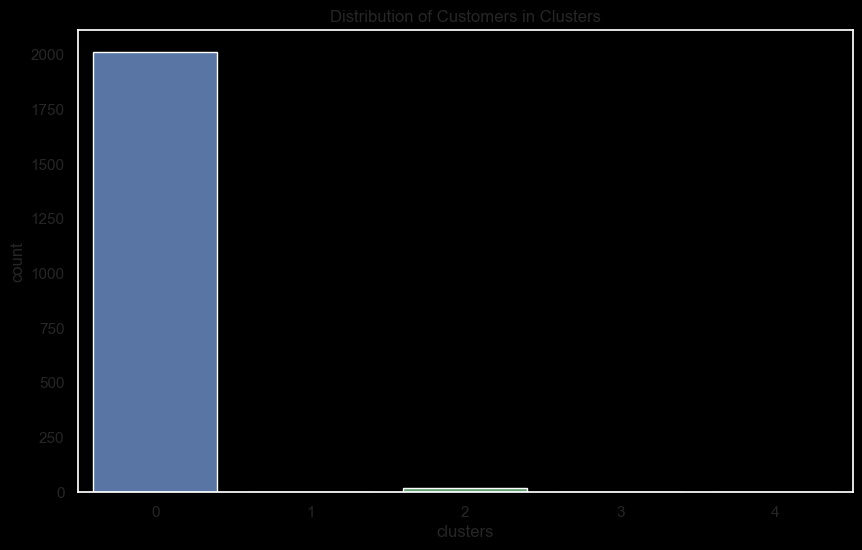

In [91]:
# Plotting the distribution of clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='clusters', data=df)
plt.title('Distribution of Customers in Clusters')
plt.show()

# **KMEANS CLUSTER**

In [92]:
from sklearn.cluster import KMeans

In [93]:
kmeans=KMeans(n_clusters=6,random_state=0)
predict=kmeans.fit_predict(df_transformed)

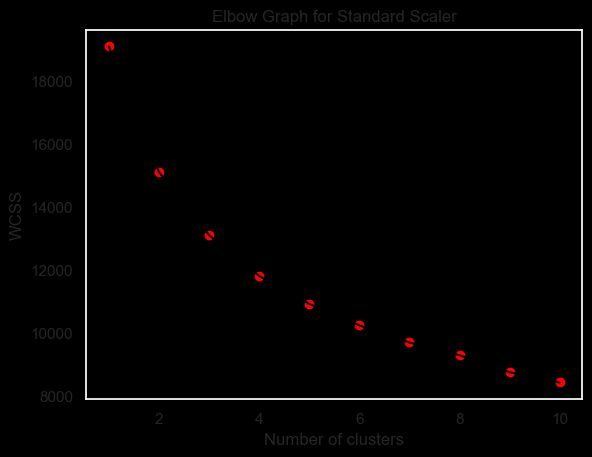

In [94]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_transformed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,color = 'black')
plt.scatter(range(1,11),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [95]:
from sklearn.metrics import silhouette_score, silhouette_samples

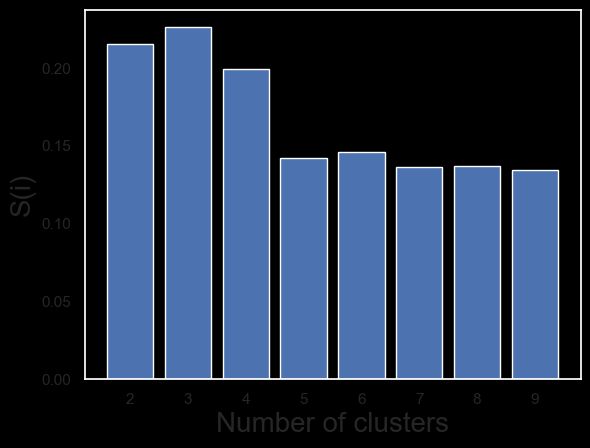

In [96]:
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(df_transformed)
    silhouette_scores.append(silhouette_score(df_transformed, m1.fit_predict(df_transformed)))
plt.bar(range(2,10), silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

In [97]:
# Getting the maximum value of silhouette score and adding 2 in index because index starts from 2.

sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  3


# **Choose Perfect Score**

In [98]:
cluster_new=KMeans(3,random_state=0)
cluster_new.fit(df_transformed)

KMeans(n_clusters=3, random_state=0)

In [99]:
cluster_new.labels_

array([1, 0, 1, ..., 1, 1, 0])

In [100]:
df['K_Cluster']=cluster_new.labels_

In [101]:
df

,Education,Marital_Status,Income,Recency,Complain,Age,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,clusters,K_Cluster
0,Graduation,Single,58138.0,58,0,67,0,1617,1,32,0,1
1,Graduation,Single,46344.0,38,0,70,2,27,0,11,0,0
2,Graduation,Together,71613.0,26,0,59,0,776,0,25,0,1
3,Graduation,Together,26646.0,26,0,40,1,53,0,14,0,0
4,PhD,Married,58293.0,94,0,43,1,422,0,24,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2233,Graduation,Together,666666.0,23,0,47,1,62,0,17,3,1
2235,Graduation,Married,61223.0,46,0,57,1,1341,0,23,0,1
2237,Graduation,Divorced,56981.0,91,0,43,0,1241,1,25,0,1
2238,Master,Together,69245.0,8,0,68,1,843,0,26,0,1


In [102]:
# Training a predicting using K-Means Algorithm.

kmeans=KMeans(n_clusters=number_of_clusters, random_state=42).fit(df_transformed)
pred=kmeans.predict(df_transformed)
# Appending those cluster value into main dataframe (without standard-scalar)

df['cluster'] = pred + 1

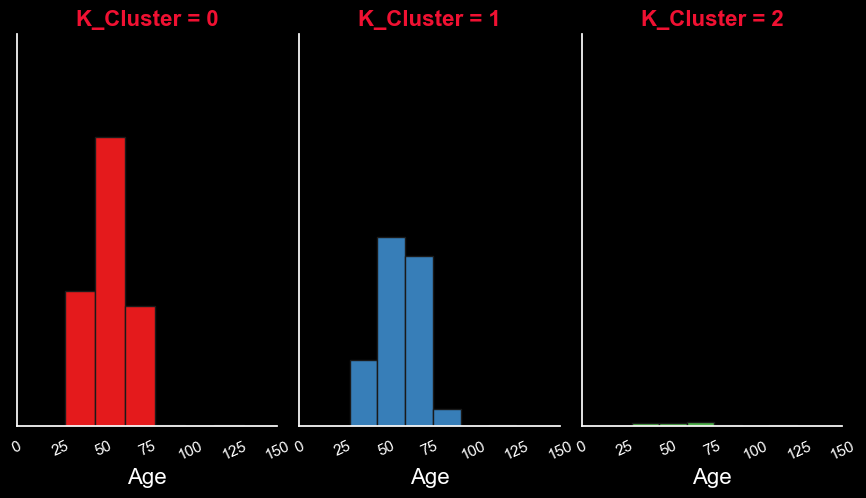

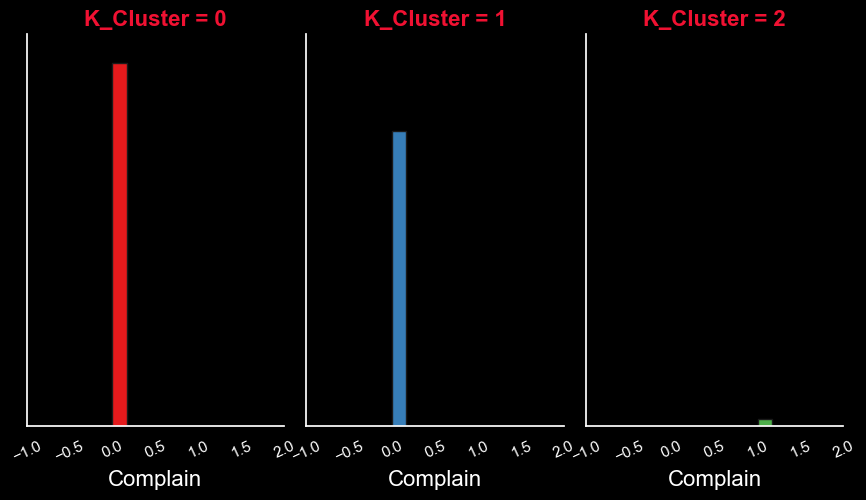

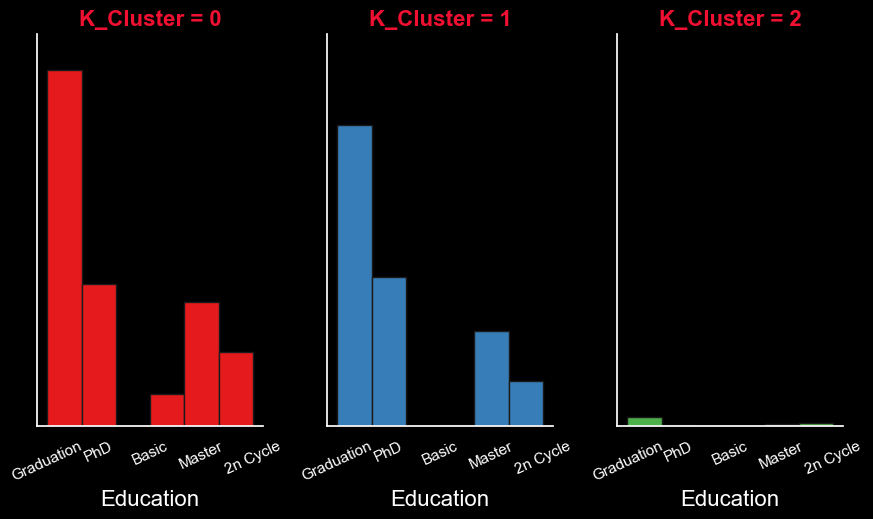

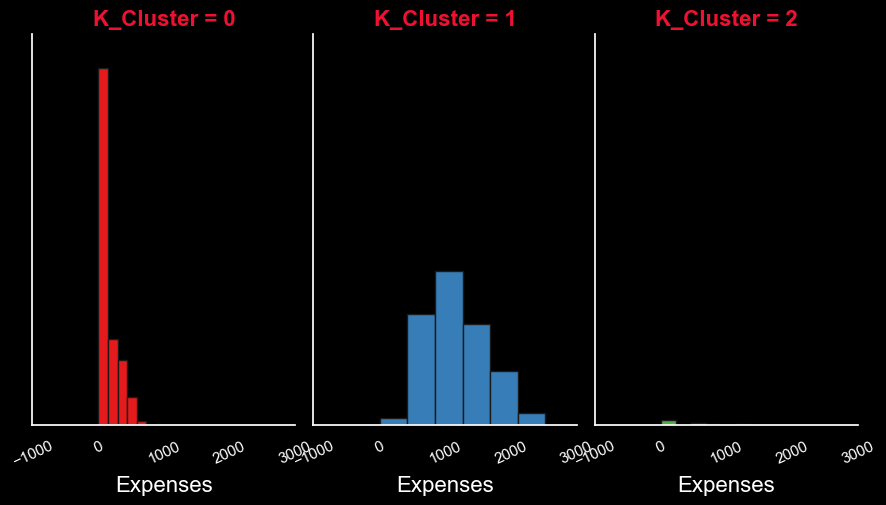

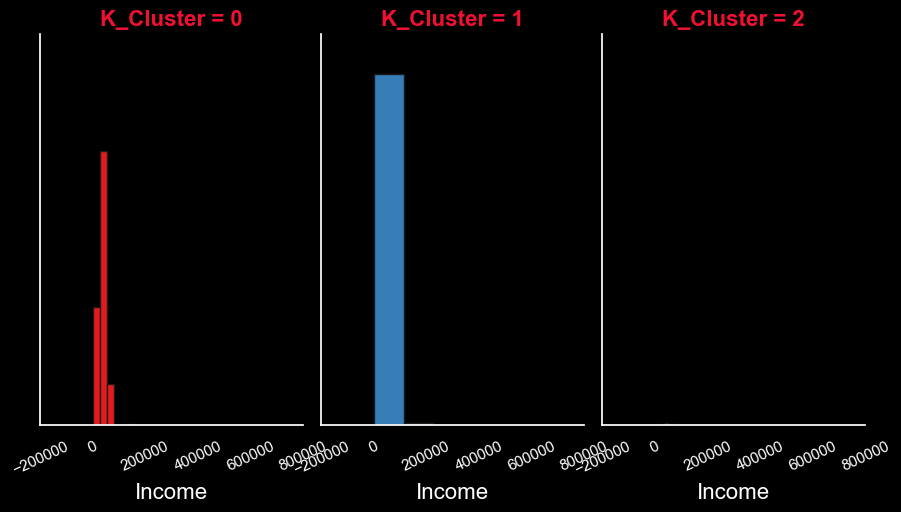

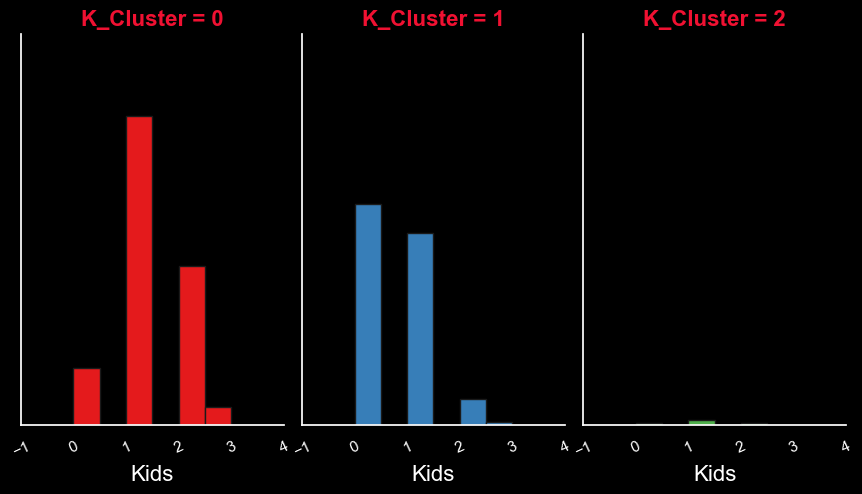

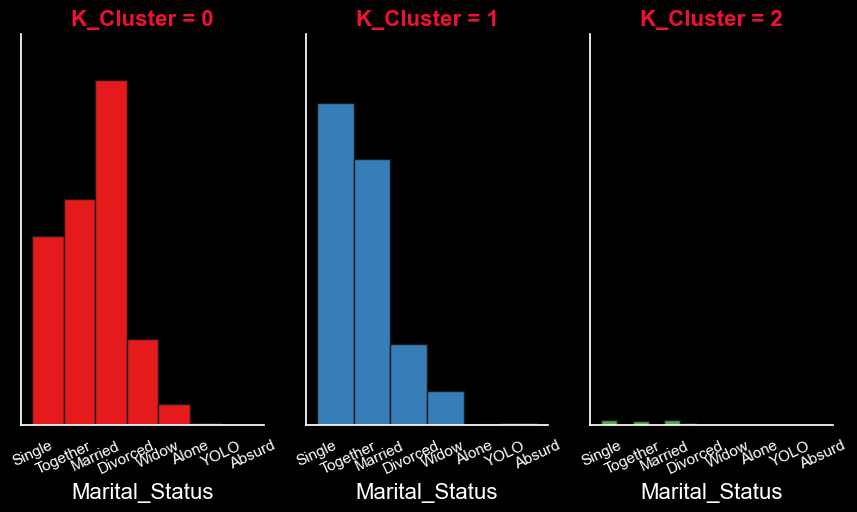

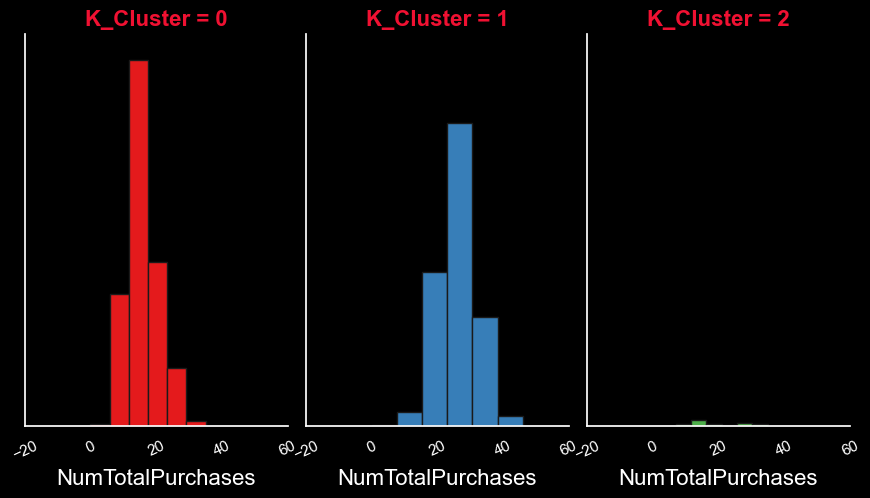

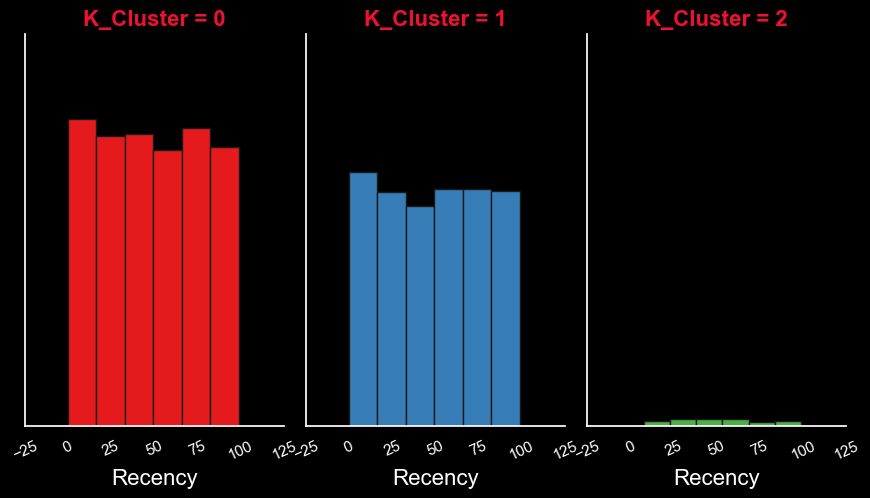

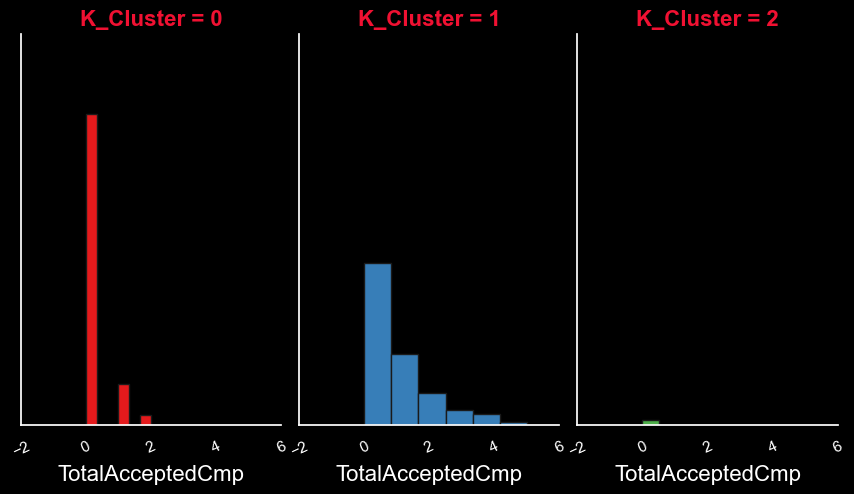

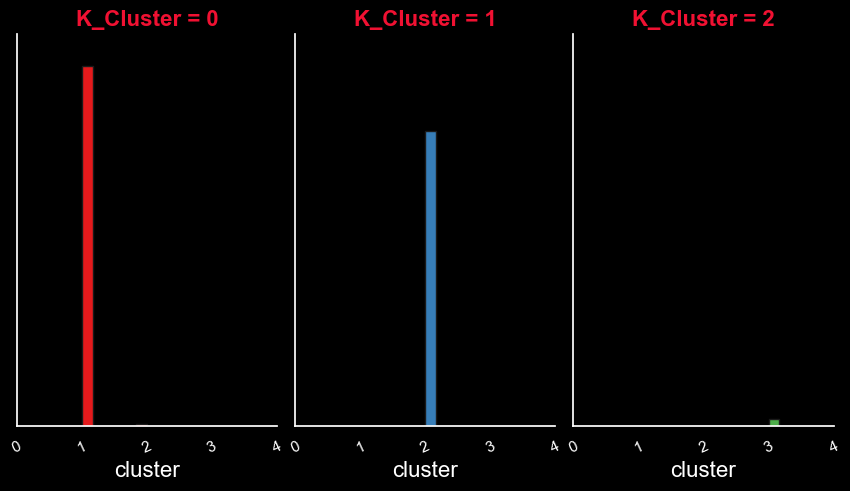

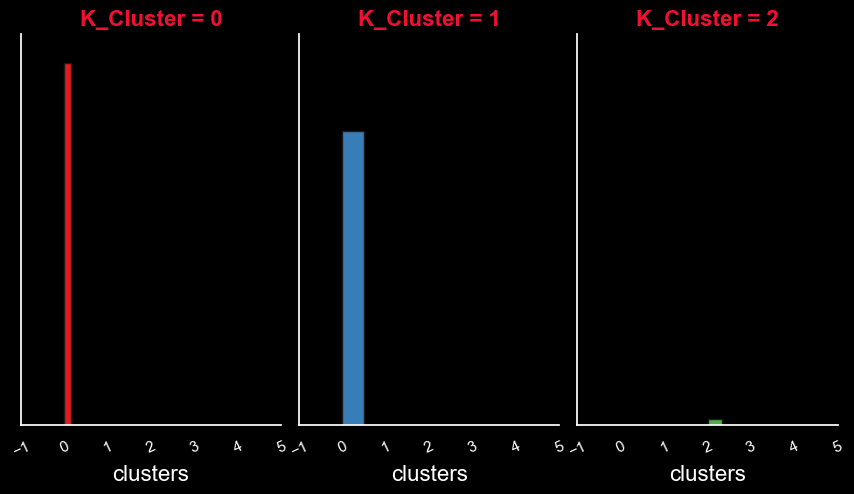

In [103]:
# Set the seaborn style
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False, 'font.family': 'sans-serif'})

# Ensure 'cluster' column exists
if 'K_Cluster' not in df.columns:
    raise ValueError("The DataFrame does not contain a 'K_Cluster' column.")

# Loop over the feature columns only
feature_columns = df.columns.difference(['K_Cluster'])

for i in feature_columns:
    diag = sns.FacetGrid(df, col='K_Cluster', hue='K_Cluster', palette='Set1')
    diag.map(plt.hist, i, bins=6, ec="k")
    diag.set_xticklabels(rotation=25, color='white')
    diag.set_yticklabels(color='white')
    diag.set_xlabels(size=16, color='white')
    diag.set_titles(size=16, color='#f01132', fontweight='bold')
    diag.fig.set_figheight(6)
    plt.show()

# **Based on above information we can divide customer into 3 parts:-**
# **Highly Active Customer :- These customers belong to cluster one.**
# **Moderately Active Customer :- These customers belong to cluster two.**
# **Least Active Customer :- These customers belong to cluster third.**

# Adding Classification Model

In [114]:
df

,Income,Recency,Complain,Age,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,clusters,K_Cluster,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138.0,58,0,67,0,1617,1,32,0,1,...,False,False,False,False,False,False,True,False,False,False
1,46344.0,38,0,70,2,27,0,11,0,0,...,False,False,False,False,False,False,True,False,False,False
2,71613.0,26,0,59,0,776,0,25,0,1,...,False,False,False,False,False,False,False,True,False,False
3,26646.0,26,0,40,1,53,0,14,0,0,...,False,False,False,False,False,False,False,True,False,False
4,58293.0,94,0,43,1,422,0,24,0,0,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,666666.0,23,0,47,1,62,0,17,3,1,...,False,False,False,False,False,False,False,True,False,False
2235,61223.0,46,0,57,1,1341,0,23,0,1,...,False,False,False,False,False,True,False,False,False,False
2237,56981.0,91,0,43,0,1241,1,25,0,1,...,False,False,False,False,True,False,False,False,False,False
2238,69245.0,8,0,68,1,843,0,26,0,1,...,True,False,False,False,False,False,False,True,False,False


In [115]:
df = pd.get_dummies(df)

In [116]:
df

,Income,Recency,Complain,Age,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,clusters,K_Cluster,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138.0,58,0,67,0,1617,1,32,0,1,...,False,False,False,False,False,False,True,False,False,False
1,46344.0,38,0,70,2,27,0,11,0,0,...,False,False,False,False,False,False,True,False,False,False
2,71613.0,26,0,59,0,776,0,25,0,1,...,False,False,False,False,False,False,False,True,False,False
3,26646.0,26,0,40,1,53,0,14,0,0,...,False,False,False,False,False,False,False,True,False,False
4,58293.0,94,0,43,1,422,0,24,0,0,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,666666.0,23,0,47,1,62,0,17,3,1,...,False,False,False,False,False,False,False,True,False,False
2235,61223.0,46,0,57,1,1341,0,23,0,1,...,False,False,False,False,False,True,False,False,False,False
2237,56981.0,91,0,43,0,1241,1,25,0,1,...,False,False,False,False,True,False,False,False,False,False
2238,69245.0,8,0,68,1,843,0,26,0,1,...,True,False,False,False,False,False,False,True,False,False


# Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression

In [111]:
classifier = LogisticRegression(max_iter=1000)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       211
           1       0.92      0.96      0.94       192
           2       0.00      0.00      0.00         4

    accuracy                           0.94       407
   macro avg       0.62      0.63      0.63       407
weighted avg       0.93      0.94      0.93       407



# Decision Tree classifier

In [112]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree classifier
classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       211
           1       0.99      0.99      0.99       192
           2       1.00      1.00      1.00         4

    accuracy                           0.99       407
   macro avg       0.99      1.00      1.00       407
weighted avg       0.99      0.99      0.99       407



# Randomforest Classifier

In [113]:
from sklearn.cluster import KMeans

# Example clustering
kmeans = KMeans(n_clusters=3)
cluster_labels = kmeans.fit_predict(df)  # X is your data

import pandas as pd

# Assuming X is a DataFrame
X_with_clusters = pd.DataFrame(df)
# X_with_clusters['cluster'] = cluster_labels


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_with_clusters.drop('K_Cluster', axis=1), X_with_clusters['K_Cluster'], test_size=0.2, random_state=42)


from sklearn.ensemble import RandomForestClassifier

# Example classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Additional evaluation
print(classification_report(y_test, y_pred))


Accuracy: 0.9926289926289926
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       211
           1       0.98      1.00      0.99       192
           2       1.00      1.00      1.00         4

    accuracy                           0.99       407
   macro avg       0.99      1.00      1.00       407
weighted avg       0.99      0.99      0.99       407

